In [1]:
%matplotlib inline
import numpy as np
import pdb
import sklearn.metrics.pairwise as sk_distance
from sklearn.metrics import pairwise_distances
import matplotlib
#matplotlib.use('tkAgg')
import matplotlib.pyplot as plt
import glob
import sys
from matplotlib.ticker import MultipleLocator
import math
from scipy.spatial import distance
from joblib import Parallel, delayed
from joblib import parallel_backend
import os
usable_cores = os.sched_getaffinity(0)
import time
import json
# os.system("taskset -p 0xff %d" % os.getpid())

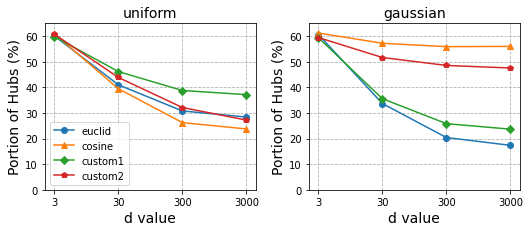

In [2]:
distances = ['euclid', 'cosine', 'custom1', 'custom2']
distrs = ['uniform', 'gaussian']
ds = [3, 30, 300, 3000] 
markers = ['o', '^', 'D', 'p']

fig, axs = plt.subplots(1, 2, gridspec_kw={'hspace': 0.1, 'wspace': 0.25, 'bottom': 0.13, 
                                       'top': 0.9, 'right':0.995, 'left':0.17}, figsize=(8,3))
x = np.arange(len(ds))
y_fit = []
for n, distr in enumerate(distrs):
    axs[n].set_title(distr, fontsize=14)
    for m, distance in enumerate(distances):
        y = []
        for d in ds:
            with open(f'jsons/d{d}.json') as f:
                read = json.load(f)
            rate = read[distr][distance]
            y.append(100-rate)
        if distance == 'euclid':
            y_fit.append(y[:])
        axs[n].plot(x, y, label=distance, marker=markers[m])

for ax in axs:
#     ax.set_xscale('log')
#     ax.set_yscale('log')
    ax.set_xlabel('d value', fontsize=14)
    ax.set_xticks(x)
    ax.set_xticklabels(ds)
    ax.grid(which='both', axis='both', ls='dashed')
    ax.set_ylim(0,65)
    ax.set_ylabel('Portion of Hubs (%)', fontsize=14)
axs[0].legend()
fig.savefig(f'plots/hubs.png', bbox_inches='tight')
        

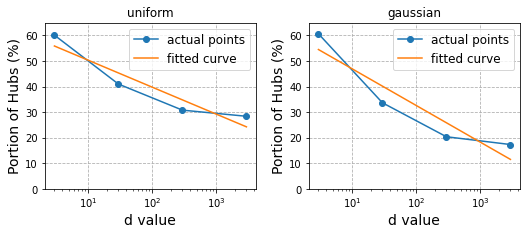

In [9]:
from scipy.optimize import curve_fit

def func_powerlaw(x, m, c, c0):
    return c0 + x**m * c

fig, axs = plt.subplots(1, 2, gridspec_kw={'hspace': 0.1, 'wspace': 0.25, 'bottom': 0.13, 
                                       'top': 0.9, 'right':0.995, 'left':0.17}, figsize=(8,3))
xdata = np.linspace(3, 3000, 500)

for n, y_euclid in enumerate(y_fit):
    sol1 = curve_fit(func_powerlaw, ds, y_euclid,maxfev = 2000)
    ydata = func_powerlaw(xdata, sol1[0][0], sol1[0][1], sol1[0][2])
    axs[n].set_title(distrs[n])
    axs[n].plot(ds, y_euclid, label='actual points', marker='o')
    axs[n].plot(xdata,ydata, label='fitted curve')

for ax in axs:
    ax.set_xscale('log')
    ax.set_xlabel('d value', fontsize=14)
    ax.grid(which='major', axis='both', ls='dashed')
    ax.set_ylim(0,65)
    ax.set_ylabel('Portion of Hubs (%)', fontsize=14)
    ax.legend(fontsize=12)
fig.savefig(f'plots/power_law.png', bbox_inches='tight')